In [7]:
import numpy as np
import cv2
import random
from PIL import Image
import matplotlib.pyplot as plt
import os
from inputdatabuilder import InputDataBuilder
from hopfieldnetwork import HopfieldNetwork
%matplotlib inline

### Hopfield denoising with $n=3$ images

In [8]:
n = 5
path = "data/MPEG7_CE-Shape-1_Part_B"
names = os.listdir(path)
random.shuffle(names)
fpaths = ["{}/{}".format(path, name) for name in names[:n]]
idb = InputDataBuilder(fpaths)

Images to load into Hopfield network:

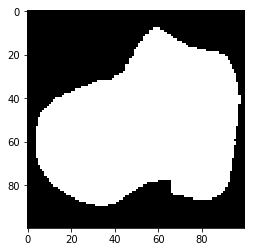

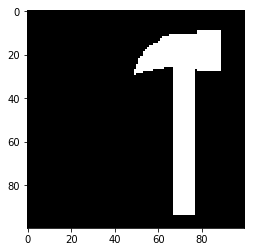

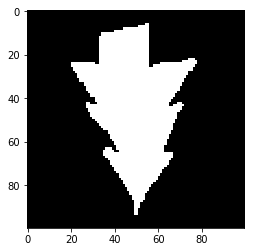

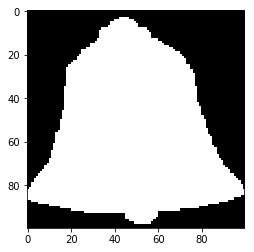

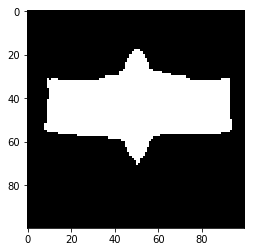

In [9]:
for img in idb.deserialize(display=True):
    plt.imshow(Image.fromarray(img), cmap='gray')
    plt.show()

### Train network

In [10]:
hn = HopfieldNetwork(n=np.prod(idb.size))
X = idb.X
for x in X:
    x[x == 0] = -1

In [11]:
hn.batch_update(X)

### Recall images

Noisy image to recall:

Hit MSE goal
Hit MSE goal
Hit MSE goal
Hit MSE goal
Hit MSE goal


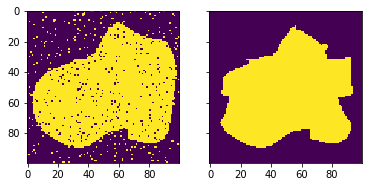

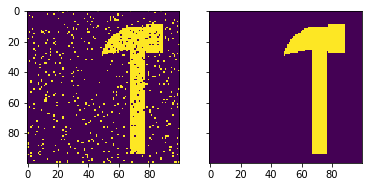

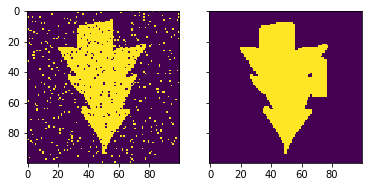

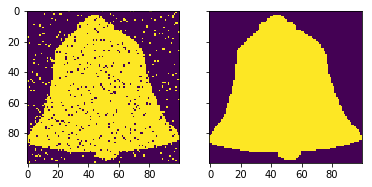

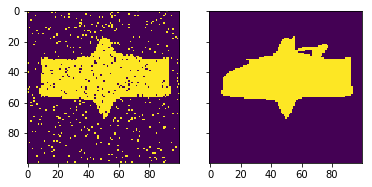

In [12]:
# format for network
noisy_imgs = idb.get_salt_pepper_noisy_imgs(p_flip=0.1)
for img in noisy_imgs:
    x_noisy = img.flatten()
    x_noisy = x_noisy.astype('int8')
    x_noisy[x_noisy == 0] = -1
    # recall image
    x_recalled = hn.recall(x_noisy, tol=1e-05)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(x_noisy.reshape(idb.size))
    ax2.imshow(x_recalled.reshape(idb.size))
